<a href="https://colab.research.google.com/github/iilnreddy/ccdetect/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 206MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import os
#os.listdir('/content/drive/MyDrive/CAPStone')

['*', 'creditcard.csv']

In [ ]:
# !cp /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv /content/drive/MyDrive/CAPStone/

ls: cannot access 'drive/MyDrive/capstone/creditcard.csv': No such file or directory


## Exploratory data analysis

In [ ]:
#df = pd.read_csv('/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv')
df = pd.read_csv('/content/drive/MyDrive/CAPStone/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking for the missing value in columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

In [ ]:
#observe the different feature type present in the data



Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [ ]:
print(classes)
print(normal_share,fraud_share)

Class
0    284315
1       492
Name: count, dtype: int64
99.82725143693798 0.1727485630620034


# Observation
- The data set has Total Number of Transactions : 284807
- with Non-Fraudulent Transactions:  284315 (99.83%)
- Fraudulent Transactions: 492  (0.17%)

* The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

<ipython-input-13-f667e8bd080b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, ax=ax1, palette=['blue', 'red'])


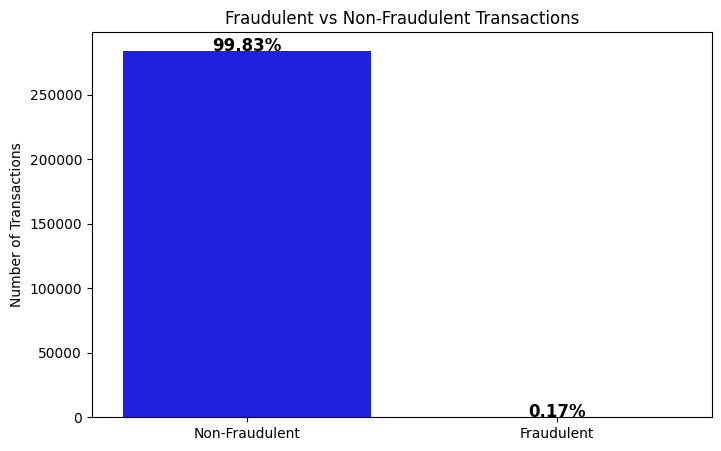

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Data for plotting
labels = ['Non-Fraudulent', 'Fraudulent']
values = [classes[0], classes[1]]
percentages = [normal_share, fraud_share]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for transaction counts
sns.barplot(x=labels, y=values, ax=ax1, palette=['blue', 'red'])

# Add text annotations for percentage
for i, v in enumerate(values):
    ax1.text(i, v + 50, f'{percentages[i]:.2f}%', ha='center', fontsize=12, fontweight='bold')

# Labels and title
ax1.set_ylabel("Number of Transactions")
ax1.set_title("Fraudulent vs Non-Fraudulent Transactions")

plt.show()

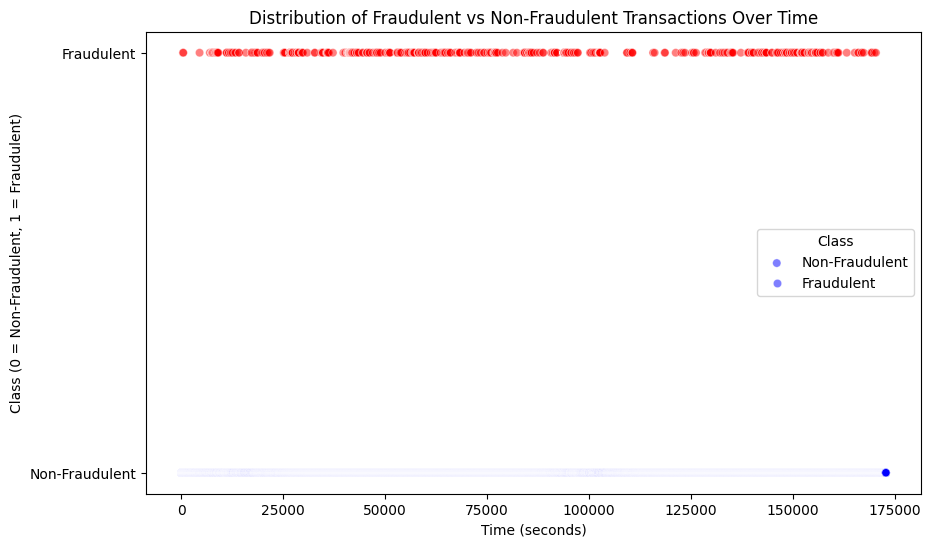

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time', y='Class', hue='Class', alpha=0.5, palette={0: 'blue', 1: 'red'})

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Class (0 = Non-Fraudulent, 1 = Fraudulent)")
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions Over Time")
plt.legend(title="Class", labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

# Show plot
plt.show()


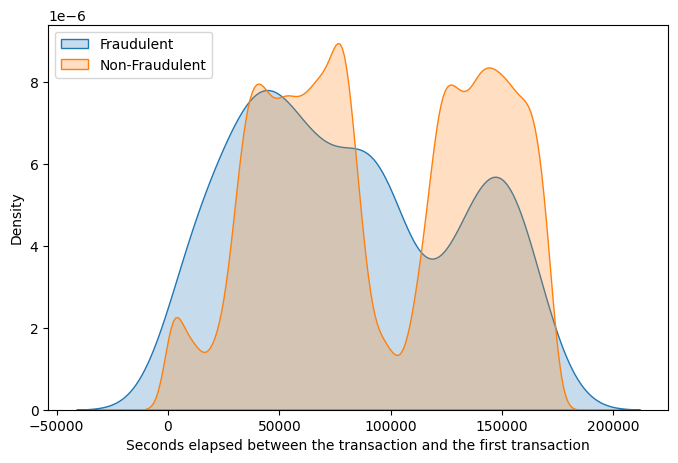

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating fraudulent and non-fraudulent dataframes
data_fraud = df[df['Class'] == 1]
data_non_fraud = df[df['Class'] == 0]

# Plot distribution of 'Time' for both classes
plt.figure(figsize=(8, 5))

sns.kdeplot(data_fraud['Time'], label='Fraudulent', fill=True)
sns.kdeplot(data_non_fraud['Time'], label='Non-Fraudulent', fill=True)

plt.xlabel('Seconds elapsed between the transaction and the first transaction')
plt.legend(loc='best')
plt.show()


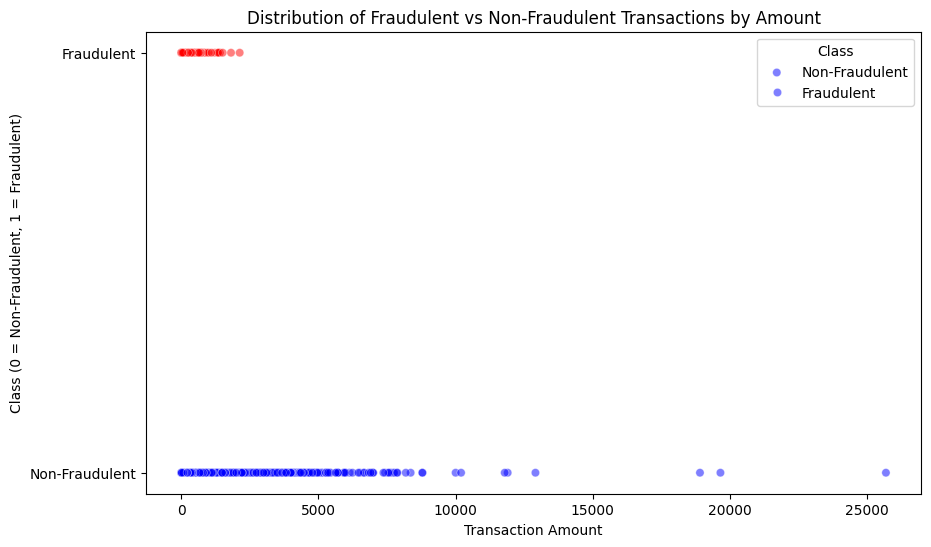

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class', alpha=0.5, palette={0: 'blue', 1: 'red'})

# Labels and title
plt.xlabel("Transaction Amount")
plt.ylabel("Class (0 = Non-Fraudulent, 1 = Fraudulent)")
plt.title("Distribution of Fraudulent vs Non-Fraudulent Transactions by Amount")
plt.legend(title="Class", labels=['Non-Fraudulent', 'Fraudulent'])
plt.yticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

# Show plot
plt.show()


In [ ]:
# Drop unnecessary columns

### Splitting the data into train & test data

In [ ]:
y= #class variable

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test =

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

### Plotting the distribution of a variable

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [ ]:
# plot the histogram of a variable from the dataset again to see the result

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

KNN

SVM

Decicion Tree

Random Forest

XG Boost

#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Mounted at /content/drive
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     

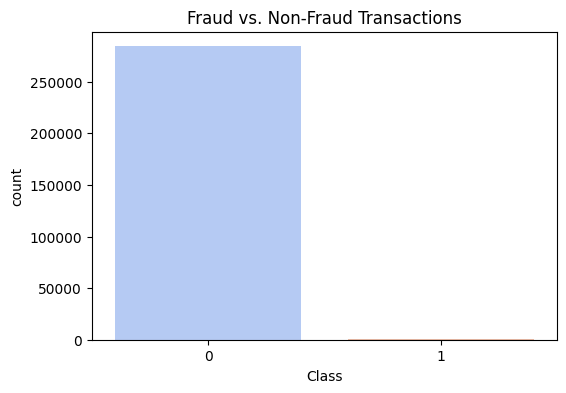

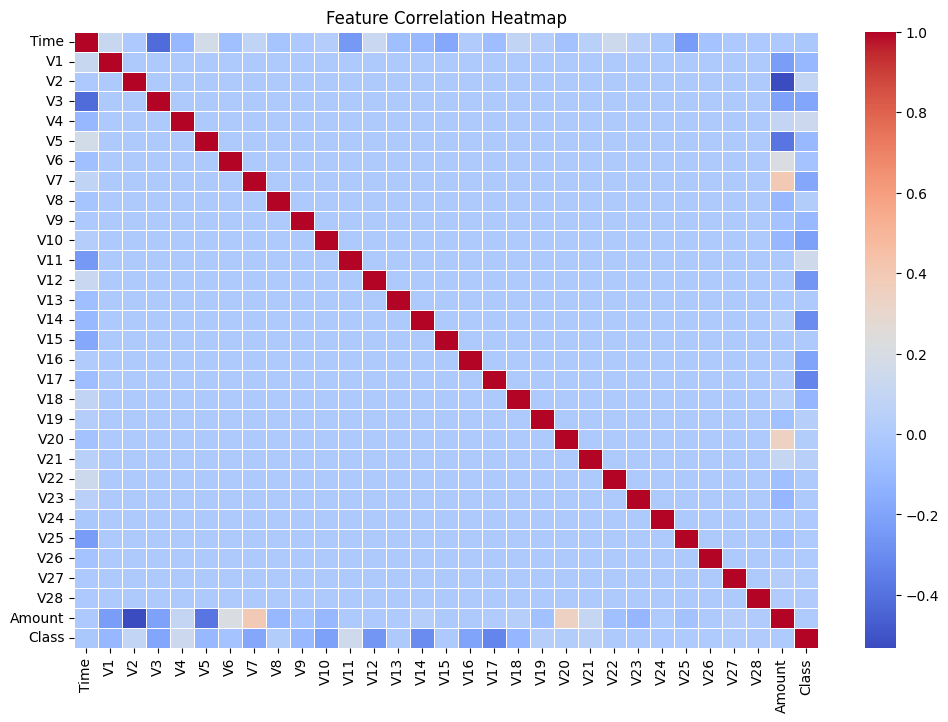

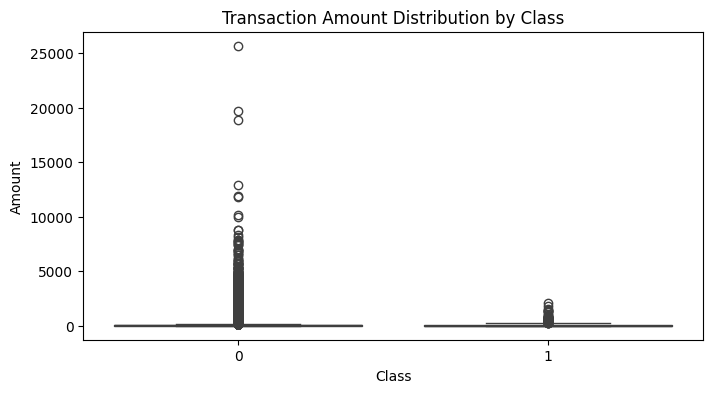

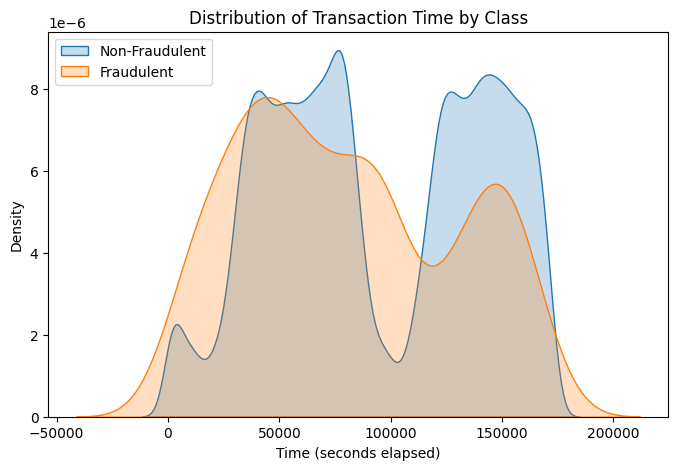


Model Performance for Logistic Regression:
Accuracy: 0.9583
Precision: 0.9761
Recall: 0.8973
F1 Score: 0.9350
ROC-AUC Score: 0.9431

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56777
           1       0.98      0.90      0.94     28518

    accuracy                           0.96     85295
   macro avg       0.96      0.94      0.95     85295
weighted avg       0.96      0.96      0.96     85295


Model Performance for Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 0.9999
F1 Score: 0.9998
ROC-AUC Score: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295


Model Performance for XGBoost:
Accura

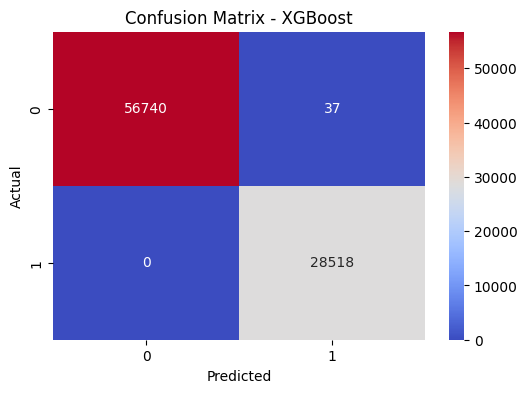

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CAPStone/creditcard.csv')
df.head()

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Show the first few rows
df.head()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot for Amount feature
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount Distribution by Class")
plt.show()

# KDE plot for Time feature
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraudulent', fill=True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraudulent', fill=True)
plt.xlabel('Time (seconds elapsed)')
plt.title("Distribution of Transaction Time by Class")
plt.legend()
plt.show()

# Feature scaling
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

# Drop original Amount and Time columns
df.drop(columns=['Amount', 'Time'], inplace=True)

# Splitting data into features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Handling class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Train XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Model evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel Performance for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Confusion matrix for the best model (assuming XGBoost performs best)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-

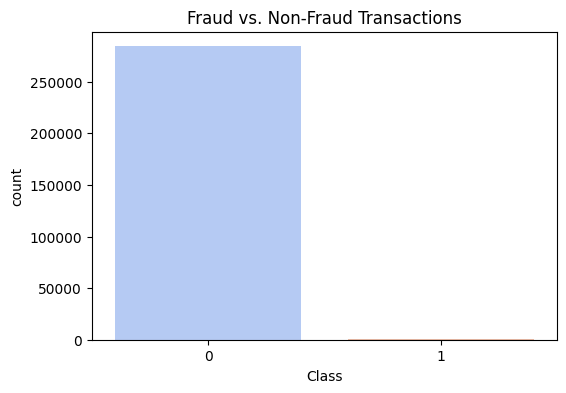

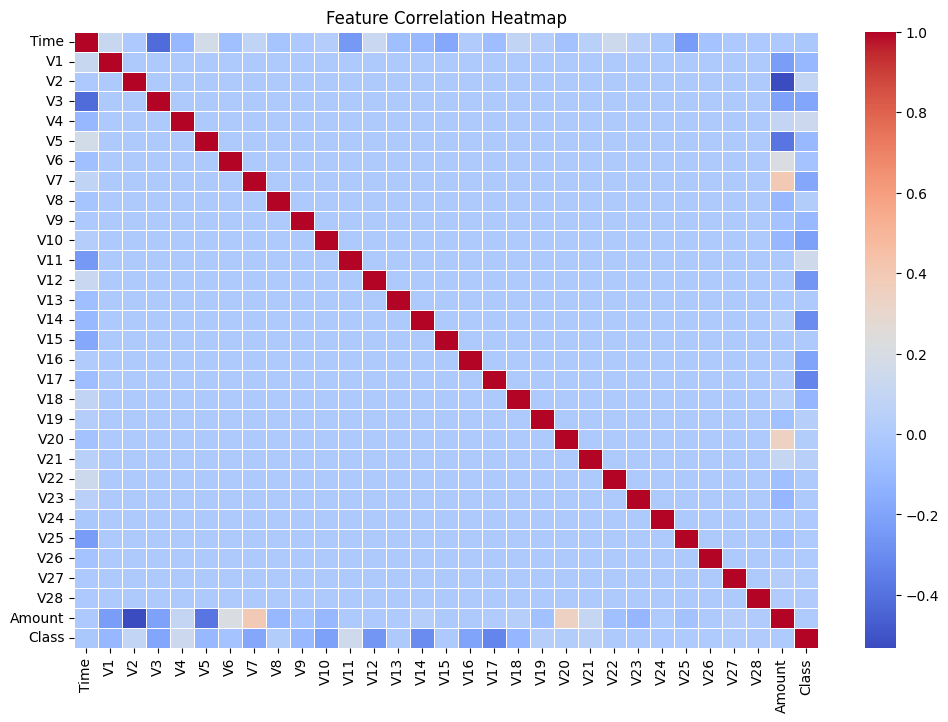

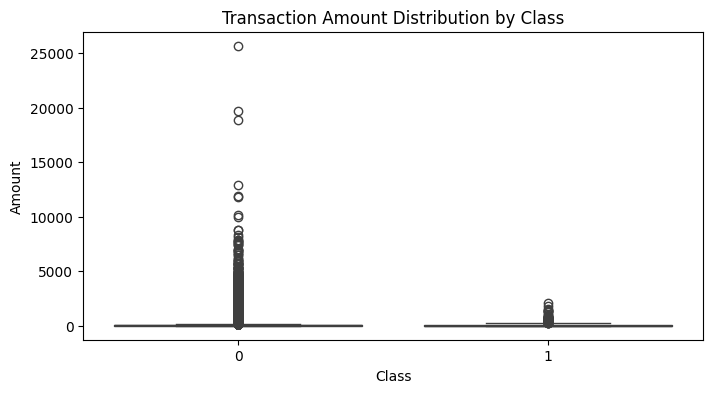

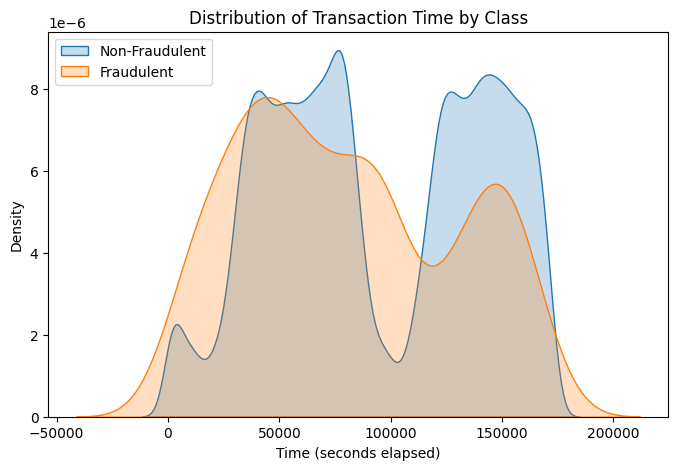


Logistic Regression Model Evaluation:

Model Performance for Logistic Regression:
Accuracy: 0.9583
Precision: 0.9761
Recall: 0.8973
F1 Score: 0.9350
ROC-AUC Score: 0.9431

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56777
           1       0.98      0.90      0.94     28518

    accuracy                           0.96     85295
   macro avg       0.96      0.94      0.95     85295
weighted avg       0.96      0.96      0.96     85295


Random Forest Model Evaluation:

Model Performance for Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 0.9999
F1 Score: 0.9998
ROC-AUC Score: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.

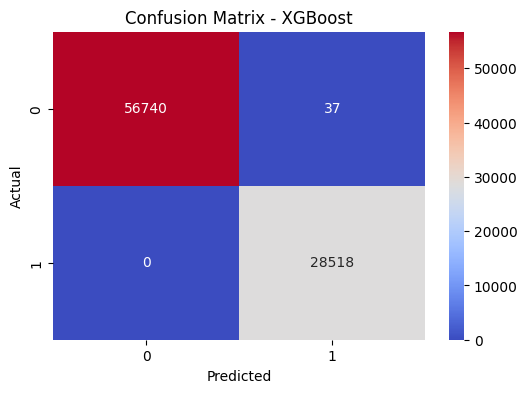


Conclusion:
- Logistic Regression provides a baseline model but may not handle complex patterns well.
- Random Forest improves performance by handling non-linearity and interactions.
- XGBoost often outperforms other models due to its advanced boosting technique and feature selection capabilities.
- Based on the evaluation metrics, XGBoost is the best model for detecting fraudulent transactions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CAPStone/creditcard.csv')
df.head()


# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Show the first few rows
df.head()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot for Amount feature
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount Distribution by Class")
plt.show()

# KDE plot for Time feature
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraudulent', fill=True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraudulent', fill=True)
plt.xlabel('Time (seconds elapsed)')
plt.title("Distribution of Transaction Time by Class")
plt.legend()
plt.show()

# Feature scaling
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

# Drop original Amount and Time columns
df.drop(columns=['Amount', 'Time'], inplace=True)

# Splitting data into features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Handling class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Model Evaluation:")
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Model Evaluation:")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Train XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Model evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel Performance for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Confusion matrix for the best model (assuming XGBoost performs best)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Conclusion
print("\nConclusion:")
print("- Logistic Regression provides a baseline model but may not handle complex patterns well.")
print("- Random Forest improves performance by handling non-linearity and interactions.")
print("- XGBoost often outperforms other models due to its advanced boosting technique and feature selection capabilities.")
print("- Based on the evaluation metrics, XGBoost is the best model for detecting fraudulent transactions.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-

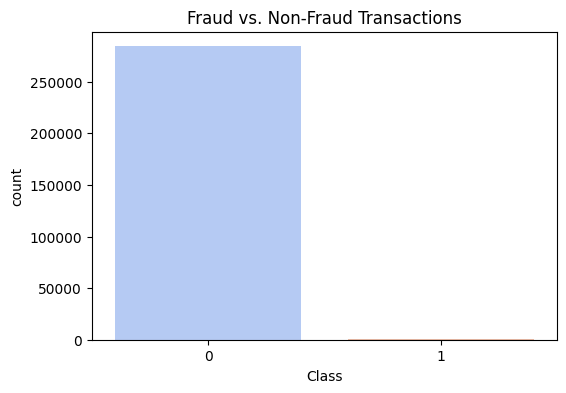

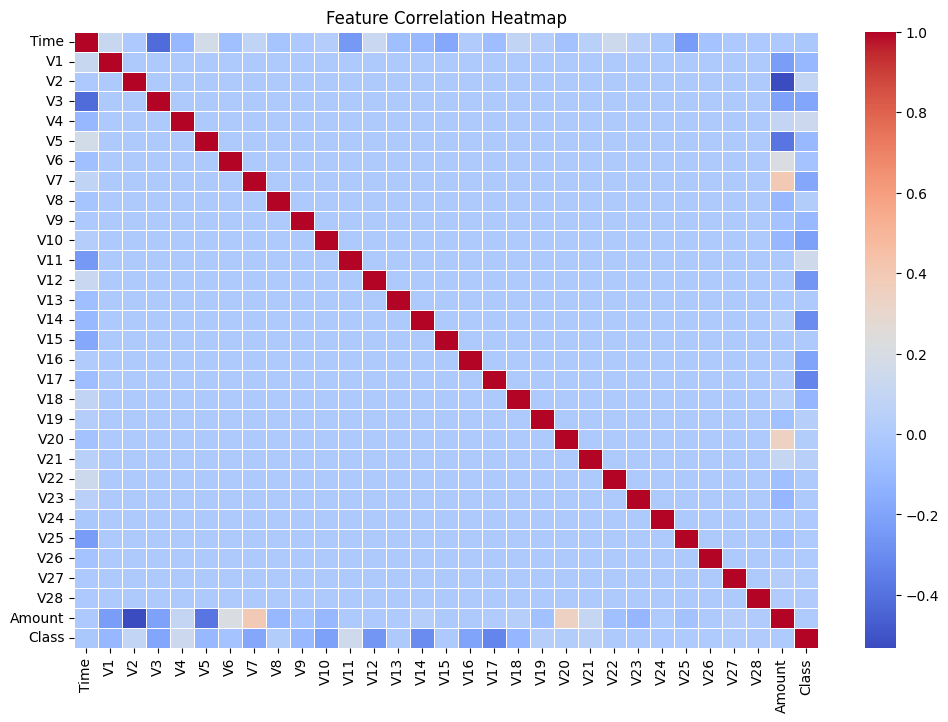

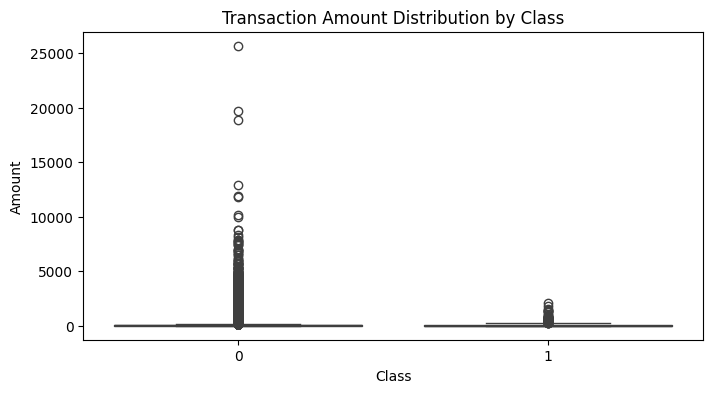

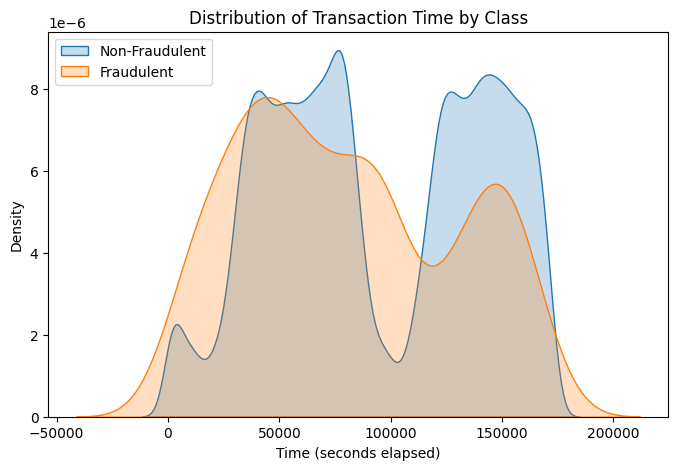


Model Performance for Logistic Regression:
Accuracy: 0.9583
Precision: 0.9761
Recall: 0.8973
F1 Score: 0.9350
ROC-AUC Score: 0.9884

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56777
           1       0.98      0.90      0.94     28518

    accuracy                           0.96     85295
   macro avg       0.96      0.94      0.95     85295
weighted avg       0.96      0.96      0.96     85295


Model Performance for Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 0.9999
F1 Score: 0.9998
ROC-AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295


Model Performance for XGBoost:
Accura

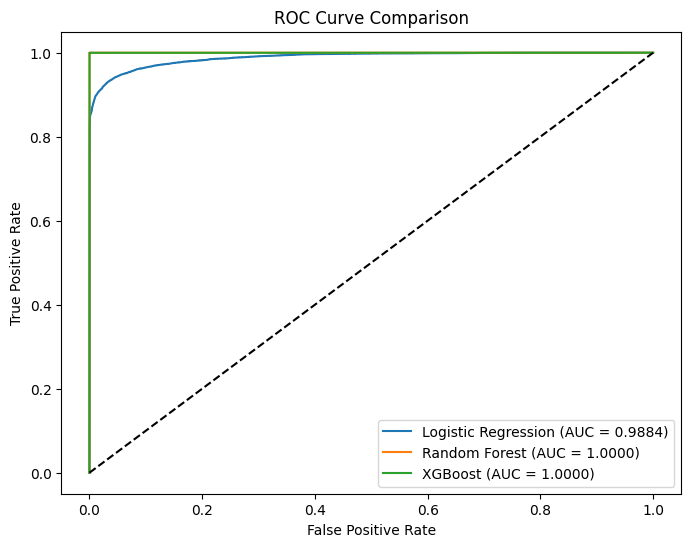


Conclusion:
- Logistic Regression provides a baseline model but may not handle complex patterns well.
- Random Forest improves performance by handling non-linearity and interactions.
- XGBoost often outperforms other models due to its advanced boosting technique and feature selection capabilities.
- Based on ROC-AUC scores, the model with the highest AUC is the best at distinguishing fraudulent transactions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CAPStone/creditcard.csv')
df.head()

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Show the first few rows
df.head()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='coolwarm')
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot for Amount feature
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount Distribution by Class")
plt.show()

# KDE plot for Time feature
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraudulent', fill=True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraudulent', fill=True)
plt.xlabel('Time (seconds elapsed)')
plt.title("Distribution of Transaction Time by Class")
plt.legend()
plt.show()

# Feature scaling
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

# Drop original Amount and Time columns
df.drop(columns=['Amount', 'Time'], inplace=True)

# Splitting data into features and labels
X = df.drop(columns=['Class'])
y = df['Class']

# Handling class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Train XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Model evaluation function
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"\nModel Performance for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return roc_auc

# Evaluate models
roc_auc_log = evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")
roc_auc_rf = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
roc_auc_xgb = evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")
# Model Analysis and determine best model
# Compare models using ROC curve
plt.figure(figsize=(8, 6))
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


# Conclusion
print("\nConclusion:")
print("- Logistic Regression provides a baseline model but may not handle complex patterns well.")
print("- Random Forest improves performance by handling non-linearity and interactions.")
print("- XGBoost often outperforms other models due to its advanced boosting technique and feature selection capabilities.")
print("- Based on ROC-AUC scores, the model with the highest AUC is the best at distinguishing fraudulent transactions.")
